In [169]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

In [170]:
df_ddos = pd.read_csv('ddos_traffic_model_ready.csv')

In [171]:
df_normal = pd.read_csv('normal_traffic_model_ready.csv')

### Columns Selection

In [172]:
df_final = pd.concat([df_ddos, df_normal])

In [173]:
df_final = df_final.sample(frac=1)

In [174]:
df_final.columns

Index(['Address-A', 'Port-A', 'Address-B', 'Port-B', 'Packets', 'Bytes',
       'StreamID', 'TotalPackets', 'PerctageFiltered',
       'Packets_A-to-B(TX_pkts)', 'Bytes_A-to-B(TX_bytes)',
       'Packets_B-to-A(RX_pkts)', 'Bytes_B-to-A(RX_bytes)', 'Relative_Start',
       'Duration', 'Bits/s A-to-B (TX_bits/s)', 'Bits/s B-to-A (RX_bits/s)',
       'tot_kbps', 'Pktrate', 'Flow Duration', 'Idle Timeout', 'Hard Timeout',
       'Pktrate nsec', 'Byte nsec', 'Syn', 'Acknowledgment', 'Fin', 'Reset',
       'Push', 'Length', 'TCP Segment Len', 'Header Length', 'Bytes In Flight',
       'flags', 'CATEGORY'],
      dtype='object')

In [175]:
X = df_final.drop(labels=['Address-A', 'Port-A', 'Address-B', 'Port-B', 'StreamID', 
                         'PerctageFiltered', 'CATEGORY', 'Relative_Start', 
                         'TotalPackets', 'Syn', 'Acknowledgment', 'Fin', 'Reset', 'Length', 'TCP Segment Len', 'Push',
                         'Bytes In Flight', 'Duration', 'Header Length'], axis=1)

In [176]:
y = df_final['CATEGORY']

## Consider all categories

### Logistic Regression

In [145]:
X_scaled = preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.3)
logreg = LogisticRegression(C=0.03, max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(C=0.03, max_iter=1000)

In [146]:
y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test, y_pred_logreg))

C:\Users\jalaj\anaconda3\envs\project_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jalaj\anaconda3\envs\project_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

Benign Traffic       0.69      0.96      0.80      6616
     GoldenEye       0.00      0.00      0.00      1269
          Hulk       0.51      0.99      0.67      2841
 Slow HTTP GET       0.50      0.20      0.28      3258
     Slow Post       0.00      0.00      0.00      1832
     Slow Read       0.00      0.00      0.00       315

      accuracy                           0.61     16131
     macro avg       0.28      0.36      0.29     16131
  weighted avg       0.47      0.61      0.51     16131



C:\Users\jalaj\anaconda3\envs\project_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree Classifier

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
dt = DecisionTreeClassifier(criterion='gini',
                             random_state=42).fit(X_train, y_train)

In [148]:
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

                precision    recall  f1-score   support

Benign Traffic       1.00      1.00      1.00      4449
     GoldenEye       0.72      0.72      0.72       837
          Hulk       0.76      0.73      0.75      1880
 Slow HTTP GET       1.00      1.00      1.00      2194
     Slow Post       0.74      0.78      0.76      1193
     Slow Read       0.37      0.42      0.39       201

      accuracy                           0.90     10754
     macro avg       0.77      0.77      0.77     10754
  weighted avg       0.90      0.90      0.90     10754



### SVC

In [149]:
X_scaled = preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.3)
svm_model = svm.SVC().fit(X_train, y_train)

In [150]:
y_pred_svc = svm_model.predict(X_test)
print(classification_report(y_test, y_pred_svc))

C:\Users\jalaj\anaconda3\envs\project_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jalaj\anaconda3\envs\project_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

Benign Traffic       0.75      0.87      0.81      6616
     GoldenEye       0.00      0.00      0.00      1269
          Hulk       0.53      0.97      0.69      2841
 Slow HTTP GET       0.59      0.51      0.55      3258
     Slow Post       0.96      0.27      0.42      1832
     Slow Read       0.00      0.00      0.00       315

      accuracy                           0.66     16131
     macro avg       0.47      0.44      0.41     16131
  weighted avg       0.63      0.66      0.61     16131



C:\Users\jalaj\anaconda3\envs\project_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### RandomForestClassifier

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
rf = RandomForestClassifier(criterion='gini', 
                                     n_estimators=500,
                                     min_samples_split=2,
                                     #min_samples_leaf=1,
                                     max_features='sqrt',
                                     oob_score=False,
                                     random_state=42,
                                     n_jobs=-1).fit(X_train, y_train)

In [206]:
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

                precision    recall  f1-score   support

Benign Traffic       1.00      1.00      1.00      6638
     GoldenEye       0.76      0.84      0.80      1288
          Hulk       0.78      0.87      0.82      2884
 Slow HTTP GET       1.00      1.00      1.00      3227
     Slow Post       0.90      0.74      0.81      1802
     Slow Read       0.56      0.24      0.34       292

      accuracy                           0.92     16131
     macro avg       0.83      0.78      0.79     16131
  weighted avg       0.92      0.92      0.92     16131



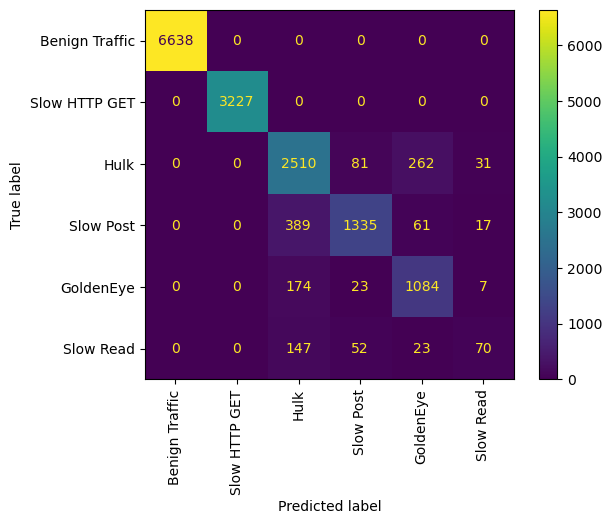

In [207]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, labels=df_final["CATEGORY"].unique(), xticks_rotation="vertical")

In [213]:
metrics.fbeta_score(y_test, y_pred_rf, beta=1, labels=df_final["CATEGORY"].unique(), average='weighted')

0.9189335254081693

#### Plotting Precision-Recall and ROC for RandomForest

In [181]:
# need to convert string category classes to int for this
CATEGORY_MAP = {'Benign Traffic':0, 'Slow HTTP GET':1, 'Slow Read':2, 'Slow Post':3, 'GoldenEye':4, 'Hulk':5}

In [182]:
y_int = y.map(CATEGORY_MAP)

In [183]:
Y = preprocessing.label_binarize(y_int, classes=[*range(len(set(y_int)))])

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    random_state = 42)

In [199]:
clf = OneVsRestClassifier(RandomForestClassifier(criterion='gini', 
                                                 n_estimators=500,
                                                 min_samples_split=2,
                                                 #min_samples_leaf=1,
                                                 max_features='sqrt',
                                                 oob_score=True,
                                                 random_state=42,
                                                 n_jobs=-1))

clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(n_estimators=500,
                                                     n_jobs=-1, oob_score=True,
                                                     random_state=42))

In [200]:
y_score = clf.predict_proba(X_test)
y_pred_clf = clf.predict(X_test)

In [201]:
print(classification_report(y_test, y_pred_clf, target_names=list(CATEGORY_MAP.keys())))

                precision    recall  f1-score   support

Benign Traffic       1.00      1.00      1.00      5489
 Slow HTTP GET       1.00      1.00      1.00      2716
     Slow Read       0.64      0.23      0.34       249
     Slow Post       0.92      0.73      0.81      1509
     GoldenEye       0.77      0.82      0.79      1064
          Hulk       0.80      0.82      0.81      2416

     micro avg       0.93      0.91      0.92     13443
     macro avg       0.85      0.77      0.79     13443
  weighted avg       0.93      0.91      0.92     13443
   samples avg       0.91      0.91      0.91     13443



C:\Users\jalaj\anaconda3\envs\project_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


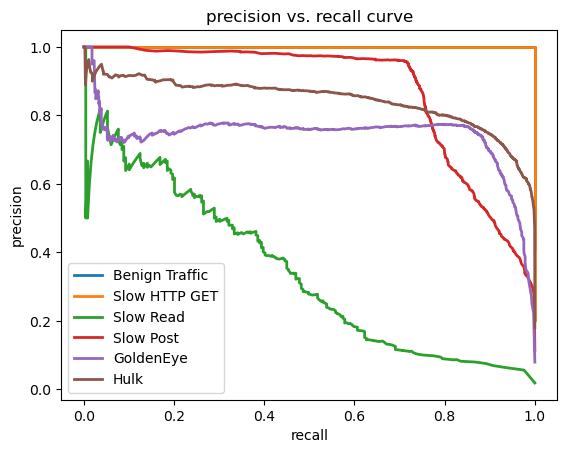

In [195]:
n_classes = len(df_final["CATEGORY"].unique())
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = metrics.precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='{}'.format(list(CATEGORY_MAP.keys())[i]))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

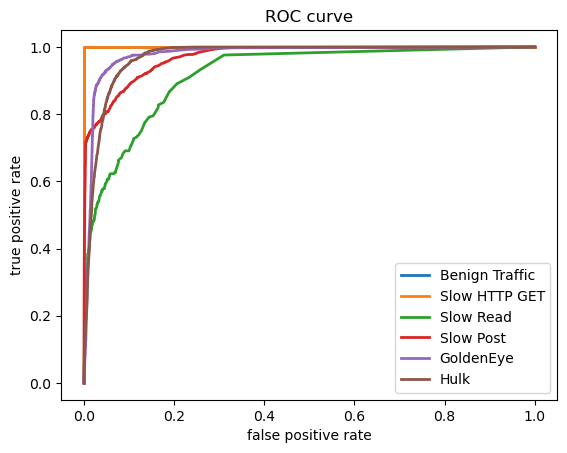

In [196]:
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:, i],
                                  y_score[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='{}'.format(list(CATEGORY_MAP.keys())[i]))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

           Predicted
            0-B    1-D
Actual 0    TN      FP
       1    FN      TP
       
Evaluation Graphs
1. Precision - Recall curve
2. F0.5 score  - weights to Recall
3. fpr, tpr, threshholds - ROC

## Consider only Malicious and Benign

### Column Selection

In [37]:
df_final2 = df_final.copy()

In [38]:
df_final2['CATEGORY2'] = ["Malicious" if i in ['Slow HTTP GET', 'Slow Read', 'Slow Post', 'GoldenEye', 'Hulk'] else i for i in df_final2["CATEGORY"] ]

In [39]:
df_final2.drop('CATEGORY', axis=1, inplace=True)

In [89]:
df_final2 = df_final2.sample(frac=1)

In [90]:
df_final2.columns

Index(['Address-A', 'Port-A', 'Address-B', 'Port-B', 'Packets', 'Bytes',
       'StreamID', 'TotalPackets', 'PerctageFiltered',
       'Packets_A-to-B(TX_pkts)', 'Bytes_A-to-B(TX_bytes)',
       'Packets_B-to-A(RX_pkts)', 'Bytes_B-to-A(RX_bytes)', 'Relative_Start',
       'Duration', 'Bits/s A-to-B (TX_bits/s)', 'Bits/s B-to-A (RX_bits/s)',
       'tot_kbps', 'Pktrate', 'Flow Duration', 'Idle Timeout', 'Hard Timeout',
       'Pktrate nsec', 'Byte nsec', 'Syn', 'Acknowledgment', 'Fin', 'Reset',
       'Push', 'Length', 'TCP Segment Len', 'Header Length', 'Bytes In Flight',
       'flags', 'CATEGORY2'],
      dtype='object')

In [104]:
X = df_final2.drop(labels=['Address-A', 'Port-A', 'Address-B', 'Port-B', 'StreamID', 
                         'PerctageFiltered', 'CATEGORY2', 'Relative_Start', 
                         'TotalPackets', 'Syn', 'Acknowledgment', 'Fin', 'Reset', 'Length', 'TCP Segment Len', 'Push',
                         'Bytes In Flight', 'Duration', 'Header Length'], axis=1)

y = df_final2['CATEGORY2']

### Logistic Regression

In [105]:
X_scaled = preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.3, stratify=y)
logreg = LogisticRegression(C=0.03, max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(C=0.03, max_iter=1000)

In [106]:
y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test, y_pred_logreg))

                precision    recall  f1-score   support

Benign Traffic       0.95      0.47      0.63      6694
     Malicious       0.72      0.98      0.83      9437

      accuracy                           0.77     16131
     macro avg       0.84      0.73      0.73     16131
  weighted avg       0.82      0.77      0.75     16131



### DecisionTree Classifier

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, stratify=y)
dt = DecisionTreeClassifier(criterion='gini',
                             random_state=42).fit(X_train, y_train)

In [108]:
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

                precision    recall  f1-score   support

Benign Traffic       1.00      1.00      1.00      6694
     Malicious       1.00      1.00      1.00      9437

      accuracy                           1.00     16131
     macro avg       1.00      1.00      1.00     16131
  weighted avg       1.00      1.00      1.00     16131



In [109]:
dt.feature_importances_

array([9.99124782e-01, 0.00000000e+00, 9.40665312e-06, 1.55799468e-05,
       3.28097545e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.56628980e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.26470549e-04])

In [110]:
X_train.columns

Index(['Packets', 'Bytes', 'Packets_A-to-B(TX_pkts)', 'Bytes_A-to-B(TX_bytes)',
       'Packets_B-to-A(RX_pkts)', 'Bytes_B-to-A(RX_bytes)',
       'Bits/s A-to-B (TX_bits/s)', 'Bits/s B-to-A (RX_bits/s)', 'tot_kbps',
       'Pktrate', 'Flow Duration', 'Idle Timeout', 'Hard Timeout',
       'Pktrate nsec', 'Byte nsec', 'flags'],
      dtype='object')

### SVM

In [47]:
X_scaled = preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.3)
svm_model = svm.SVC().fit(X_train, y_train)

In [48]:
y_pred_svc = svm_model.predict(X_test)
print(classification_report(y_test, y_pred_svc))

                precision    recall  f1-score   support

Benign Traffic       0.88      0.75      0.81      6748
     Malicious       0.84      0.93      0.88      9383

      accuracy                           0.86     16131
     macro avg       0.86      0.84      0.85     16131
  weighted avg       0.86      0.86      0.85     16131



### RandomForestClassifier

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, stratify=y)
rf = RandomForestClassifier(criterion='gini', 
                                     n_estimators=500,
                                     min_samples_split=2,
                                     #min_samples_leaf=1,
                                     max_features='sqrt',
                                     oob_score=False,
                                     random_state=42,
                                     n_jobs=-1).fit(X_train, y_train)

In [112]:
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

                precision    recall  f1-score   support

Benign Traffic       1.00      1.00      1.00      6694
     Malicious       1.00      1.00      1.00      9437

      accuracy                           1.00     16131
     macro avg       1.00      1.00      1.00     16131
  weighted avg       1.00      1.00      1.00     16131



## Combining all Slow HTTP into Slowloris

In [113]:
df_final3 = df_final.copy()

In [114]:
df_final3["CATEGORY3"] = ["Slow_HTTP" if i in ['Slow HTTP GET', 'Slow Read', 'Slow Post'] else i for i in df_final3["CATEGORY"] ]

In [115]:
df_final3.drop('CATEGORY', axis=1, inplace=True)

In [116]:
df_final3 = df_final3.sample(frac=1)

In [117]:
df_final3.columns

Index(['Address-A', 'Port-A', 'Address-B', 'Port-B', 'Packets', 'Bytes',
       'StreamID', 'TotalPackets', 'PerctageFiltered',
       'Packets_A-to-B(TX_pkts)', 'Bytes_A-to-B(TX_bytes)',
       'Packets_B-to-A(RX_pkts)', 'Bytes_B-to-A(RX_bytes)', 'Relative_Start',
       'Duration', 'Bits/s A-to-B (TX_bits/s)', 'Bits/s B-to-A (RX_bits/s)',
       'tot_kbps', 'Pktrate', 'Flow Duration', 'Idle Timeout', 'Hard Timeout',
       'Pktrate nsec', 'Byte nsec', 'Syn', 'Acknowledgment', 'Fin', 'Reset',
       'Push', 'Length', 'TCP Segment Len', 'Header Length', 'Bytes In Flight',
       'flags', 'CATEGORY3'],
      dtype='object')

In [118]:
X = df_final3.drop(labels=['Address-A', 'Port-A', 'Address-B', 'Port-B', 'StreamID', 
                         'PerctageFiltered', 'CATEGORY3', 'Relative_Start', 
                         'TotalPackets', 'Syn', 'Acknowledgment', 'Fin', 'Reset', 'Length', 'TCP Segment Len', 'Push',
                         'Bytes In Flight', 'Duration', 'Header Length'], axis=1)

y = df_final3['CATEGORY3']

### LogisticRegression

In [119]:
X_scaled = preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.3, stratify=y)
logreg = LogisticRegression(C=0.03, max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(C=0.03, max_iter=1000)

In [120]:
y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test, y_pred_logreg))

C:\Users\jalaj\anaconda3\envs\project_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jalaj\anaconda3\envs\project_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

Benign Traffic       0.84      0.71      0.77      6694
     GoldenEye       0.00      0.00      0.00      1283
          Hulk       0.46      0.40      0.43      2852
     Slow_HTTP       0.49      0.75      0.60      5302

      accuracy                           0.61     16131
     macro avg       0.45      0.46      0.45     16131
  weighted avg       0.59      0.61      0.59     16131



C:\Users\jalaj\anaconda3\envs\project_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### DecisionTreeClassifier

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, stratify=y)
dt = DecisionTreeClassifier(criterion='gini',
                             random_state=42).fit(X_train, y_train)

In [122]:
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

                precision    recall  f1-score   support

Benign Traffic       1.00      1.00      1.00      6694
     GoldenEye       0.70      0.71      0.71      1283
          Hulk       0.76      0.75      0.75      2852
     Slow_HTTP       0.90      0.90      0.90      5302

      accuracy                           0.90     16131
     macro avg       0.84      0.84      0.84     16131
  weighted avg       0.90      0.90      0.90     16131



### RandomForestClassifier

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, stratify=y)
rf = RandomForestClassifier(criterion='gini', 
                                     n_estimators=500,
                                     min_samples_split=2,
                                     #min_samples_leaf=1,
                                     max_features='sqrt',
                                     oob_score=False,
                                     random_state=42,
                                     n_jobs=-1).fit(X_train, y_train)

In [124]:
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

                precision    recall  f1-score   support

Benign Traffic       1.00      1.00      1.00      6694
     GoldenEye       0.78      0.83      0.80      1283
          Hulk       0.78      0.86      0.82      2852
     Slow_HTTP       0.96      0.89      0.92      5302

      accuracy                           0.93     16131
     macro avg       0.88      0.89      0.89     16131
  weighted avg       0.93      0.93      0.93     16131



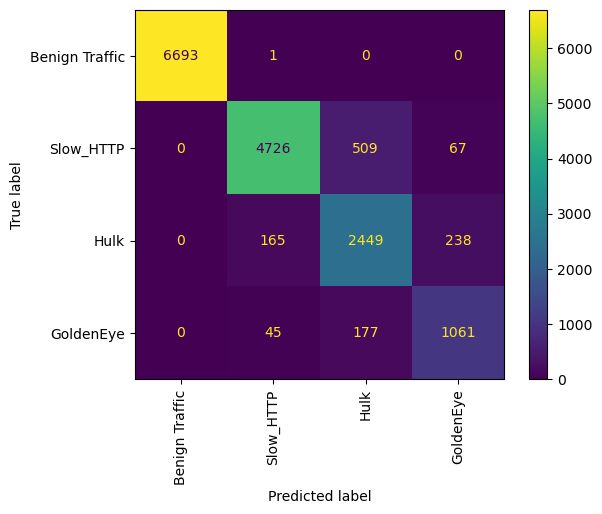

In [126]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, labels=df_final3["CATEGORY3"].unique(), xticks_rotation="vertical")

## Unsupervised Learning

In [125]:
from sklearn.cluster import KMeans